In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio
from numba import njit
import gdown


2023-07-18 13:25:24.329346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [32]:
# Focuses on Lips of Face and turns to data
#face detection in a video

def load_video(path:str) -> List[float]:
    #face detection in a video
    cap=cv2.VideoCapture(path)
    frames1 = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        # Read the frame
        bruh, img1 = cap.read()
        # Convert to grayscale
        gray1 = tf.image.rgb_to_grayscale(img1).numpy()
        frame = tf.image.rgb_to_grayscale(img1)
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
        # Detect the faces
        faces = face_cascade.detectMultiScale(gray1, 1.1, 4)
        for (x, y, w, h) in faces:
            cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
            leftcut=x
            rightcut=x+w
            topcut=y+int(.7*h)
            bottomcut=y+h
        frames1.append(frame[topcut:bottomcut, leftcut:rightcut,:])      
        # Release the VideoCapture object
    cap.release()
    
    #help focus on vital data
    mean = tf.math.reduce_mean(frames1)
    std =tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames1-mean), tf.float32) / std

In [33]:
video_path = 'bbal6n.mpg'
frames = load_video(video_path)

InvalidArgumentError: {{function_node __wrapped__Pack_N_75_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [41,135,1] != values[2].shape = [41,136,1] [Op:Pack] name: packed

In [26]:
plt.imshow(frames[27])

2023-07-18 13:51:06.688089: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: slice index 27 of dimension 0 out of bounds.


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 27 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [22]:
#Tests

#face detection in a video
cap=cv2.VideoCapture('bbal6n.mpg')

frames2 = []
leftcut=[]
rightcut=[]
topcut=[]
bottomcut=[]
for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    # Read the frame
    bruh, img1 = cap.read()
    # Convert to grayscale
    gray1 = tf.image.rgb_to_grayscale(img1).numpy()
    gray2 = tf.image.rgb_to_grayscale(img1)
    #frame = tf.image.rgb_to_grayscale(img1)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray1, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
        #leftcut.append(x)
        #rightcut.append(x+w)
        #topcut.append(y+int(.7*h))
        #bottomcut.append(y+h)
        leftcut=x
        rightcut=x+w
        topcut=y+int(.7*h)
        bottomcut=y+h
    frames2.append(gray2[topcut:bottomcut, leftcut:rightcut,:])      
# Release the VideoCapture object
cap.release()


In [29]:
frames2


[<tf.Tensor: shape=(41, 135, 1), dtype=uint8, numpy=
 array([[[172],
         [172],
         [167],
         ...,
         [140],
         [140],
         [140]],
 
        [[172],
         [172],
         [167],
         ...,
         [140],
         [140],
         [140]],
 
        [[172],
         [172],
         [170],
         ...,
         [140],
         [140],
         [140]],
 
        ...,
 
        [[164],
         [164],
         [164],
         ...,
         [134],
         [134],
         [134]],
 
        [[164],
         [164],
         [164],
         ...,
         [134],
         [134],
         [133]],
 
        [[160],
         [160],
         [160],
         ...,
         [132],
         [132],
         [132]]], dtype=uint8)>,
 <tf.Tensor: shape=(41, 135, 1), dtype=uint8, numpy=
 array([[[170],
         [169],
         [160],
         ...,
         [140],
         [139],
         [139]],
 
        [[170],
         [170],
         [167],
         ...,
         [13

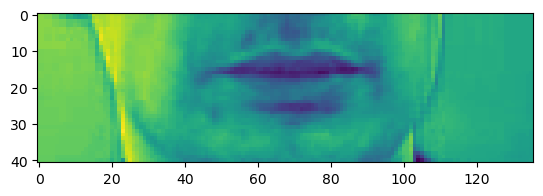

In [23]:
plt.imshow(frames2[2])

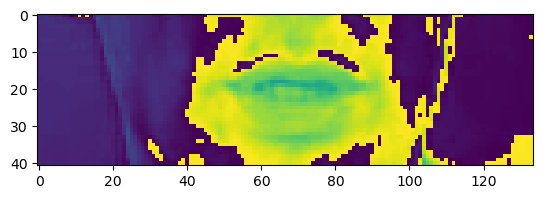

In [16]:
plt.imshow(frames[27])

In [9]:
# Focuses on Lips of Face and turns to data
def load_video1(path:str) -> List[float]:
    
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        #isolates mouth use Dlib to isolate mouth to update
        frames.append(frame[190:236, 80:220,:])        
    cap.release()
    
    #help focus on vital data
    mean = tf.math.reduce_mean(frames)
    std =tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames-mean), tf.float32) / std

In [10]:
video_path = 'bbal6n.mpg'
frames1 = load_video1(video_path)

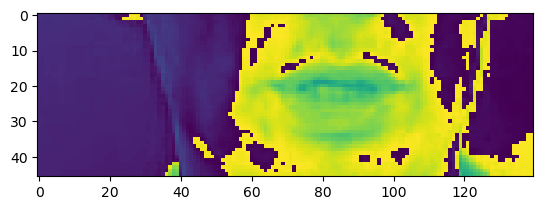

In [11]:
plt.imshow(frames1[27])

In [12]:
# Focuses on Lips of Face and turns to data
def load_video(path:str) -> List[float]:
    
    cap = cv2.VideoCapture('bbal6n.mpg')
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
         #isolates mouth use Dlib to isolate mouth to update
        frames.append(frame[:, :,:])        
    cap.release()

    #help focus on vital data
    mean = tf.math.reduce_mean(frames)
    std =tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames-mean), tf.float32) / std

video_path = 'bbal6n.mpg'
frames = load_video(video_path)

In [34]:
#face detection in a video
cap=cv2.VideoCapture('bbal6n.mpg')

for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Read the frame
    bruh, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    cv2.imshow('img0', img)
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
# Release the VideoCapture object
cap.release()

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread

In [35]:
#Works

#face detection in a video
cap=cv2.VideoCapture('bbal6n.mpg')
frames = []


for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Read the frame
    bruh, img1 = cap.read()
    # Convert to grayscale
    gray1 = tf.image.rgb_to_grayscale(img1).numpy()
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frames.append(gray1[:, :,:])   
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray1, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    cv2.imshow('img1', img1)
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
# Release the VideoCapture object
cap.release()

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread (0x7aa1280).
Cannot move to target thread (0x751eba0)

QObject::moveToThread: Current thread (0x751eba0) is not the object's thread

In [36]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')